### **PHASE 1: Load Dataset in Google Colab**

In [ ]:
# Step 1: Upload Dunnhumby Dataset Files
from google.colab import files
uploaded = files.upload()


Saving transaction_data.csv to transaction_data.csv
Saving product.csv to product.csv
Saving hh_demographic.csv to hh_demographic.csv
Saving coupon_redempt.csv to coupon_redempt.csv
Saving coupon.csv to coupon.csv
Saving causal_data.csv to causal_data.csv
Saving campaign_table.csv to campaign_table.csv
Saving campaign_desc.csv to campaign_desc.csv


In [ ]:
# Step 2: Download necessary Python Libraries
!pip install pandas
!pip install numpy

In [ ]:
# Step 3: Import necessary Python Libraries
import pandas as pd
import numpy as np


In [ ]:
# Step 4: Load uploaded All 8 CSV Files
transactions = pd.read_csv('transaction_data.csv')
products = pd.read_csv('product.csv')
coupons = pd.read_csv('coupon.csv')
coupon_redempt = pd.read_csv('coupon_redempt.csv')
demographics = pd.read_csv('hh_demographic.csv')
campaigns = pd.read_csv('campaign_table.csv')
campaign_desc = pd.read_csv('campaign_desc.csv')
causal_data = pd.read_csv('causal_data.csv') # This file was not uploaded

In [ ]:
# Step 5: Step 4: Preview All 8 Datasets
print("Transactions:")
display(transactions.head(3))

print("Products:")
display(products.head(3))

print("Coupons:")
display(coupons.head(3))

print("Coupon Redemptions:")
display(coupon_redempt.head(3))

print("Demographics:")
display(demographics.head(3))

print("Campaign Table:")
display(campaigns.head(3))

print("Campaign Description:")
display(campaign_desc.head(3))

print("Casual Data:")
display(causal_data.head(3))


Transactions:


household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   
1           2375  26984851472    1     1033142         1         0.82   
2           2375  26984851472    1     1036325         1         0.99   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  
0       364         -0.6        1631        1          0.0                0.0  
1       364          0.0        1631        1          0.0                0.0  
2       364         -0.3        1631        1          0.0                0.0

Products:


PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND            COMMODITY_DESC  \
0       25671             2       GROCERY  National                  FRZN ICE   
1       26081             2  MISC. TRANS.  National  NO COMMODITY DESCRIPTION   
2       26093            69        PASTRY   Private                     BREAD   

            SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
0          ICE - CRUSHED/CUBED                22 LB  
1  NO SUBCOMMODITY DESCRIPTION                       
2         BREAD:ITALIAN/FRENCH

Coupons:


COUPON_UPC  PRODUCT_ID  CAMPAIGN
0  10000089061       27160         4
1  10000089064       27754         9
2  10000089073       28897        12

Coupon Redemptions:


household_key  DAY   COUPON_UPC  CAMPAIGN
0              1  421  10000085364         8
1              1  421  51700010076         8
2              1  427  54200000033         8

Demographics:


AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0      65+                   A      35-49K      Homeowner  2 Adults No Kids   
1    45-54                   A      50-74K      Homeowner  2 Adults No Kids   
2    25-34                   U      25-34K        Unknown     2 Adults Kids   

  HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  household_key  
0                   2      None/Unknown              1  
1                   2      None/Unknown              7  
2                   3                 1              8

Campaign Table:


DESCRIPTION  household_key  CAMPAIGN
0       TypeA             17        26
1       TypeA             27        26
2       TypeA            212        26

Campaign Description:


DESCRIPTION  CAMPAIGN  START_DAY  END_DAY
0       TypeB        24        659      719
1       TypeC        15        547      708
2       TypeB        25        659      691

Casual Data:


PRODUCT_ID  STORE_ID  WEEK_NO display mailer
0       26190       286       70       0      A
1       26190       288       70       0      A
2       26190       289       70       0      A

### **PHASE 2: Clean, Merge, and Calculate Profit Columns**

In [ ]:
# Step 1: Check Nulls

# Check for missing values

print("Missing values in each table:")

print("Transactions:\n", transactions.isnull().sum())

print("Products:\n", products.isnull().sum())


Missing values in each table:
Transactions:
 household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64
Products:
 PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64


In [ ]:
# Step 2: Check Basic Info

transactions.info()

products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92

In [ ]:
# Step 3: Keep Needed Columns Only

# Focus on key columns

transactions = transactions[['household_key', 'PRODUCT_ID', 'BASKET_ID', 'QUANTITY',
                             'SALES_VALUE', 'RETAIL_DISC', 'COUPON_DISC', 'TRANS_TIME']]

products = products[['PRODUCT_ID', 'MANUFACTURER', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC']]

In [ ]:
# Step 4: Handle Missing / Zero Quantities

# Drop rows where quantity is 0 or missing
transactions = transactions[transactions['QUANTITY'] > 0]
transactions.dropna(subset=['SALES_VALUE'], inplace=True)

/tmp/ipython-input-15-1649668236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.dropna(subset=['SALES_VALUE'], inplace=True)


In [ ]:
# Step 5: Calculate Cost, Revenue, and Profit

# sales_value = price after discount
# cost = price before discount
# profit = revenue - cost (so profit is negative if heavy discount)

# Step-by-step profit logic

transactions['revenue'] = transactions['SALES_VALUE']

transactions['total_discount'] = transactions['RETAIL_DISC'].fillna(0) + transactions['COUPON_DISC'].fillna(0)

transactions['cost'] = transactions['SALES_VALUE'] + transactions['total_discount']

transactions['profit'] = transactions['revenue'] - transactions['cost']

In [ ]:
# Step 6: Merge With Product Info

# Add product-level details
df = pd.merge(transactions, products, on='PRODUCT_ID', how='left')

In [ ]:
# Step 7: Final Preview

# Preview full transaction + profit + product info
df[['PRODUCT_ID', 'QUANTITY', 'revenue', 'cost', 'profit',
    'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC']].head(5)

PRODUCT_ID  QUANTITY  revenue  cost  profit     BRAND  \
0     1004906         1     1.39  0.79    0.60   Private   
1     1033142         1     0.82  0.82    0.00  National   
2     1036325         1     0.99  0.69    0.30   Private   
3     1082185         1     1.21  1.21    0.00  National   
4     8160430         1     1.50  1.11    0.39   Private   

                COMMODITY_DESC          SUB_COMMODITY_DESC  
0                     POTATOES  POTATOES RUSSET (BULK&BAG)  
1                       ONIONS     ONIONS SWEET (BULK&BAG)  
2      VEGETABLES - ALL OTHERS                      CELERY  
3               TROPICAL FRUIT                     BANANAS  
4  ORGANICS FRUIT & VEGETABLES             ORGANIC CARROTS

### **PHASE 3: Group by SKU – Total Units, Profit, Cost**

In [ ]:
# Step 1: Group by SKU
sku_summary = df.groupby(['PRODUCT_ID', 'BRAND', 'COMMODITY_DESC']).agg({
    'QUANTITY': 'sum',
    'cost': 'sum',
    'revenue': 'sum',
    'profit': 'sum'
}).reset_index()

In [ ]:
# Step 2: Calculate Profit Margin

# Avoid division by zero
sku_summary['profit_margin'] = np.where(
    sku_summary['revenue'] == 0, 0,
    (sku_summary['profit'] / sku_summary['revenue']) * 100
)


In [ ]:
# Step 3: Sort

# Highest to lowest profit
sku_summary = sku_summary.sort_values(by='profit', ascending=False)

In [ ]:
# Step 4: Preview
sku_summary[['PRODUCT_ID', 'QUANTITY', 'profit', 'revenue', 'profit_margin']].head(10)

PRODUCT_ID   QUANTITY    profit    revenue  profit_margin
16824      916122       6985  29965.92   28951.93     103.502323
57056     6534178  216532156  17053.89  503867.11       3.384601
25695      995242      21758  14485.43   26502.46      54.656926
52947     5569230       7682  12950.43   23651.56      54.755077
41057     1133018      12318   8198.08   14942.36      54.864693
52987     5569471       4356   7891.52   12863.07      61.350206
79087    12810391        422   7835.35    6948.97     112.755559
62262     8090537       3589   6227.70   10974.48      56.747108
31214     1044078       6040   6163.32   18896.43      32.616320
62258     8090521       3716   6122.35   11633.98      52.624725

### **PHASE 4: Profitability Matrix (Plotly Scatter Plot)**

In [ ]:
# Step 1: Download necessary Python Libraries
!pip install plotly
!pip install --quiet

ERROR: You must give at least one requirement to install (see "pip help install")


In [ ]:
# Step 2: Import necessary Python Library
import plotly.express as px

In [ ]:
# Step 3: Build Interactive Scatter Plot

fig = px.scatter(
    sku_summary,
    x='QUANTITY',
    y='profit',
    color='profit_margin',
    hover_data=['PRODUCT_ID', 'BRAND', 'COMMODITY_DESC'],
    size='revenue',
    color_continuous_scale='Viridis',
    title='💹 Product Profitability Matrix (Units Sold vs Profit)'
)

fig.update_layout(
    xaxis_title="Units Sold (Quantity)",
    yaxis_title="Total Profit",
    coloraxis_colorbar=dict(title="Profit Margin (%)"),
    template='plotly_white'
)

fig.show()

### **PHASE 5: Identify Low-Profit, High-Volume SKUs**

In [ ]:
# Step 1: Define Thresholds

# We'll use: 75th percentile for high volume and 25th percentile for low profit margin

high_volume_threshold = sku_summary['QUANTITY'].quantile(0.75)

low_margin_threshold = sku_summary['profit_margin'].quantile(0.25)

print(f"High Volume Threshold: {high_volume_threshold}")

print(f"Low Margin Threshold: {low_margin_threshold}")

High Volume Threshold: 15.0
Low Margin Threshold: 0.0


In [ ]:
# Step 2: Flag Products for Review

sku_summary['pricing_flag'] = np.where(
    (sku_summary['QUANTITY'] >= high_volume_threshold) &
    (sku_summary['profit_margin'] <= low_margin_threshold),
    'Review Pricing',
    'OK'
)

In [ ]:
# Step 3: Display Flagged SKUs

flagged = sku_summary[sku_summary['pricing_flag'] == 'Review Pricing']

print(f"{len(flagged)} Products flagged for pricing review:\n")
display(flagged[['PRODUCT_ID', 'BRAND', 'COMMODITY_DESC', 'QUANTITY',
                 'profit', 'revenue', 'profit_margin']].sort_values(by='QUANTITY', ascending=False).head(10))

3100 Products flagged for pricing review:



PRODUCT_ID     BRAND           COMMODITY_DESC  QUANTITY  profit  \
57007     6533765   Private                     FUEL      1756     0.0   
30908     1041259  National                    HERBS      1557     0.0   
16441      912681  National  VEGETABLES - ALL OTHERS      1232     0.0   
37749     1102959  National                 FRZN ICE      1207     0.0   
14298      894236  National                NEWSPAPER      1065     0.0   
20157      944836  National                     BEEF       996     0.0   
21607      957951  National                 FRZN ICE       955     0.0   
56615     6463658  National               BAG SNACKS       910     0.0   
12707      879528  National        VALUE ADDED FRUIT       878     0.0   
38770     1112238  National        VALUE ADDED FRUIT       845     0.0   

        revenue  profit_margin  
57007  28837.27            0.0  
30908    792.97            0.0  
16441    933.74            0.0  
37749   1798.35            0.0  
14298    532.50            0.0  
20157   3972.44            0.0  
21607   3380.95            0.0  
56615    273.00            0.0  
12707   1161.13            0.0  
38770   3676.72            0.0

In [ ]:
# Step 4: Export for Business Review
flagged.to_csv("low_profit_high_volume_products.csv", index=False)
print("Exported flagged SKUs as: low_profit_high_volume_products.csv")

### **PHASE 6: Recommend Pricing Changes + Insights Summary**

In [ ]:
# Step 1: Group Flagged SKUs by Brand or Category

# Let’s find which brands or categories have the most flagged products:

# Group by brand
brand_flags = flagged.groupby('BRAND').size().reset_index(name='flagged_count').sort_values(by='flagged_count', ascending=False)

# Group by commodity
category_flags = flagged.groupby('COMMODITY_DESC').size().reset_index(name='flagged_count').sort_values(by='flagged_count', ascending=False)

print("Brands with most low-profit, high-volume SKUs:")
display(brand_flags.head(5))

print("Categories with most pricing concerns:")
display(category_flags.head(5))

Brands with most low-profit, high-volume SKUs:


BRAND  flagged_count
0  National           2914
1   Private            186

Categories with most pricing concerns:


COMMODITY_DESC  flagged_count
22         BEERS/ALES            223
21               BEEF            120
83      DOMESTIC WINE            108
36   CANDY - PACKAGED             89
155          MAGAZINE             88

In [ ]:
# Step 2: Generate Actionable Pricing Recommendations

# Here’s how to recommend pricing tweaks programmatically:

def recommend_action(row):
    if row['profit_margin'] < 0:
        return 'Remove discount / raise price'
    elif row['profit_margin'] < 5:
        return 'Reduce coupon usage or optimize promo'
    else:
        return 'Minor tweak'

flagged['pricing_recommendation'] = flagged.apply(recommend_action, axis=1)


/tmp/ipython-input-40-1681993090.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Step 3: Final Export with Recommendations

flagged_final = flagged[['PRODUCT_ID', 'BRAND', 'COMMODITY_DESC', 'QUANTITY', 'profit',
                         'revenue', 'profit_margin', 'pricing_recommendation']]

flagged_final.to_csv("final_pricing_recommendations.csv", index=False)
print("Exported: final_pricing_recommendations.csv")

Exported: final_pricing_recommendations.csv


### **PHASE 7: Dashboard Visuals**

In [ ]:
# Step 1: Download necessary Python Libraries
!pip install plotly
!pip install pandas

In [ ]:
# Step 2: Import necessary Python Library
import plotly.express as px

In [ ]:
# Step 3: Load the CSV from previous phase
df = pd.read_csv("final_pricing_recommendations.csv")

In [ ]:
# Step 4: Preview
df.head()

PRODUCT_ID     BRAND       COMMODITY_DESC  QUANTITY  profit  revenue  \
0    13039529  National               COFFEE        17     0.0    42.74   
1      892603  National          SOFT DRINKS        26     0.0    20.54   
2    12523816  National     SEAFOOD - FROZEN        19     0.0    50.62   
3      892573  National             MAGAZINE       332     0.0  1118.68   
4      892369  National  FRZN JCE CONC/DRNKS        23     0.0    45.77   

   profit_margin                 pricing_recommendation  
0            0.0  Reduce coupon usage or optimize promo  
1            0.0  Reduce coupon usage or optimize promo  
2            0.0  Reduce coupon usage or optimize promo  
3            0.0  Reduce coupon usage or optimize promo  
4            0.0  Reduce coupon usage or optimize promo

In [ ]:
# Step 5: Scatter Plot: Units Sold vs Profit
fig = px.scatter(
    df,
    x='QUANTITY',
    y='profit',
    color='profit_margin',
    hover_data=['PRODUCT_ID', 'BRAND', 'COMMODITY_DESC', 'pricing_recommendation'],
    title='Units Sold vs Profit (Colored by Profit Margin)',
    color_continuous_scale='RdYlGn'
)
fig.show()

In [ ]:
# Step 6: Bar Chart: Count of Flagged SKUs by Brand

brand_counts = df['BRAND'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

fig = px.bar(
    brand_counts,
    x='brand',
    y='count',
    title='Flagged SKUs by Brand',
    text='count'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
# Step 7: Pie Chart: Distribution of Recommendations
fig = px.pie(
    df,
    names='pricing_recommendation',
    title='Pricing Recommendations Breakdown',
    hole=0.4
)
fig.show()


In [ ]:
# Step 8: Import necessary Python Library
from IPython.display import display

In [ ]:
# Step 9: Table View: Searchable SKU List
pd.set_option('display.max_rows', 100)
display(df[['PRODUCT_ID', 'BRAND', 'COMMODITY_DESC', 'QUANTITY', 'profit', 'profit_margin', 'pricing_recommendation']])

PRODUCT_ID     BRAND       COMMODITY_DESC  QUANTITY  profit  \
0       13039529  National               COFFEE        17     0.0   
1         892603  National          SOFT DRINKS        26     0.0   
2       12523816  National     SEAFOOD - FROZEN        19     0.0   
3         892573  National             MAGAZINE       332     0.0   
4         892369  National  FRZN JCE CONC/DRNKS        23     0.0   
...          ...       ...                  ...       ...     ...   
3095     1028950  National                 SOUP       172     0.0   
3096     1029549  National        COOKIES/CONES        65     0.0   
3097     1029206  National             MAGAZINE        16     0.0   
3098     1029438  National           MARGARINES        20     0.0   
3099     1029135  National              CHICKEN        29     0.0   

      profit_margin                 pricing_recommendation  
0               0.0  Reduce coupon usage or optimize promo  
1               0.0  Reduce coupon usage or optimize promo  
2               0.0  Reduce coupon usage or optimize promo  
3               0.0  Reduce coupon usage or optimize promo  
4               0.0  Reduce coupon usage or optimize promo  
...             ...                                    ...  
3095            0.0  Reduce coupon usage or optimize promo  
3096            0.0  Reduce coupon usage or optimize promo  
3097            0.0  Reduce coupon usage or optimize promo  
3098            0.0  Reduce coupon usage or optimize promo  
3099            0.0  Reduce coupon usage or optimize promo  

[3100 rows x 7 columns]

### **PHASE 8: Root Cause Visuals & Deep Dive Analysis**

In [ ]:
# Step 1: Download necessary Python Libraries
!pip install seaborn
!pip install pandas
!pip install matplotlib

In [ ]:
# Step 2: Import necessary Python Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Step 3: Cross-tabulation of flagged SKUs
pivot_table = pd.pivot_table(df,
                              index='BRAND',
                              columns='COMMODITY_DESC',
                              values='PRODUCT_ID',
                              aggfunc='count',
                              fill_value=0)

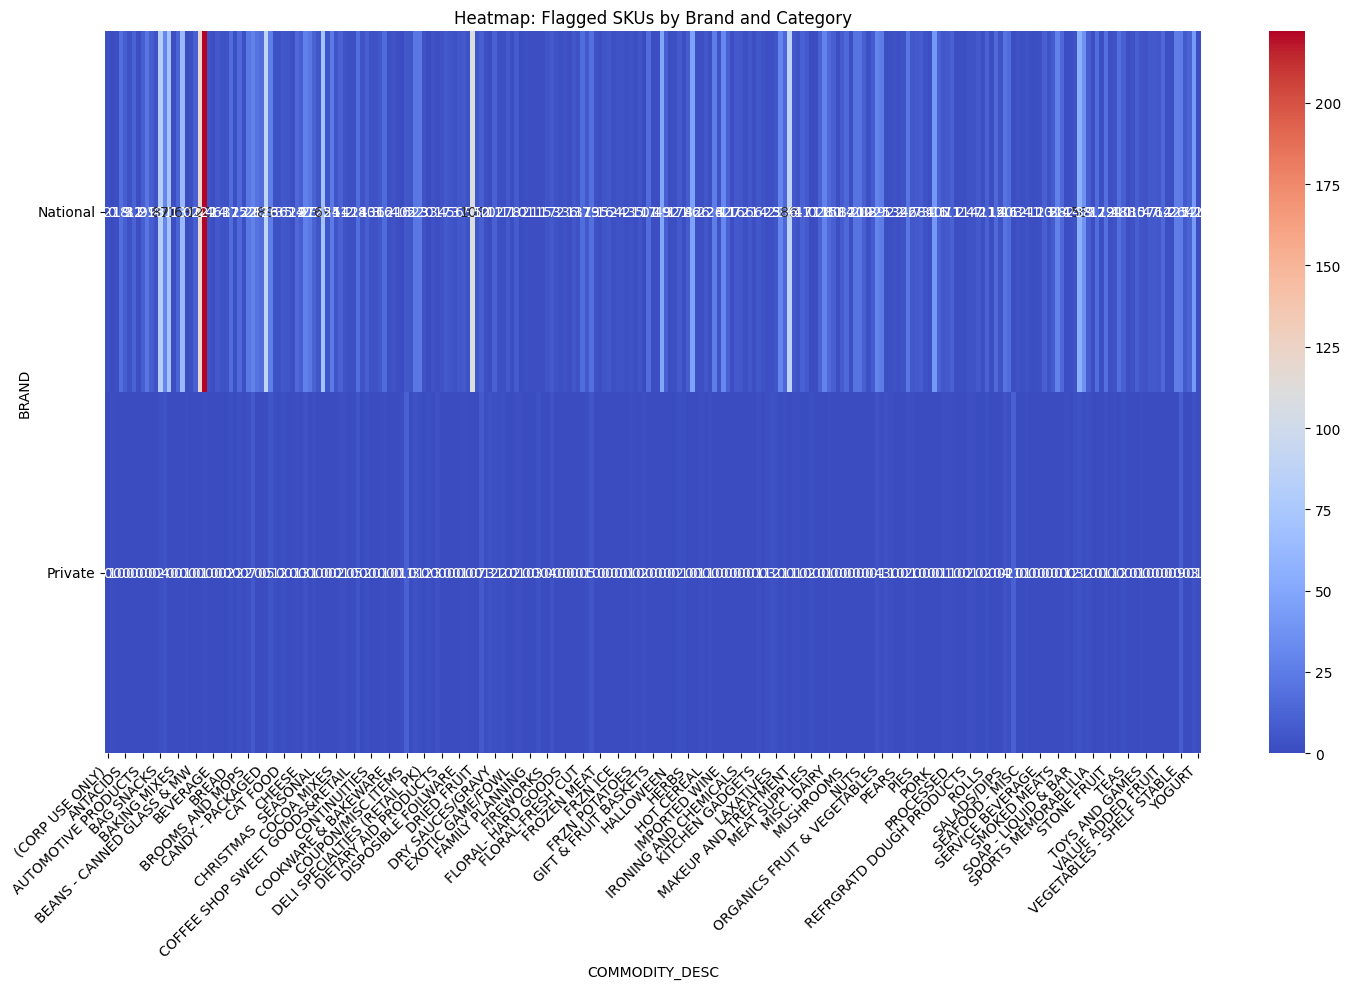

In [ ]:
# Step 4: Brand vs Category Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap: Flagged SKUs by Brand and Category")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

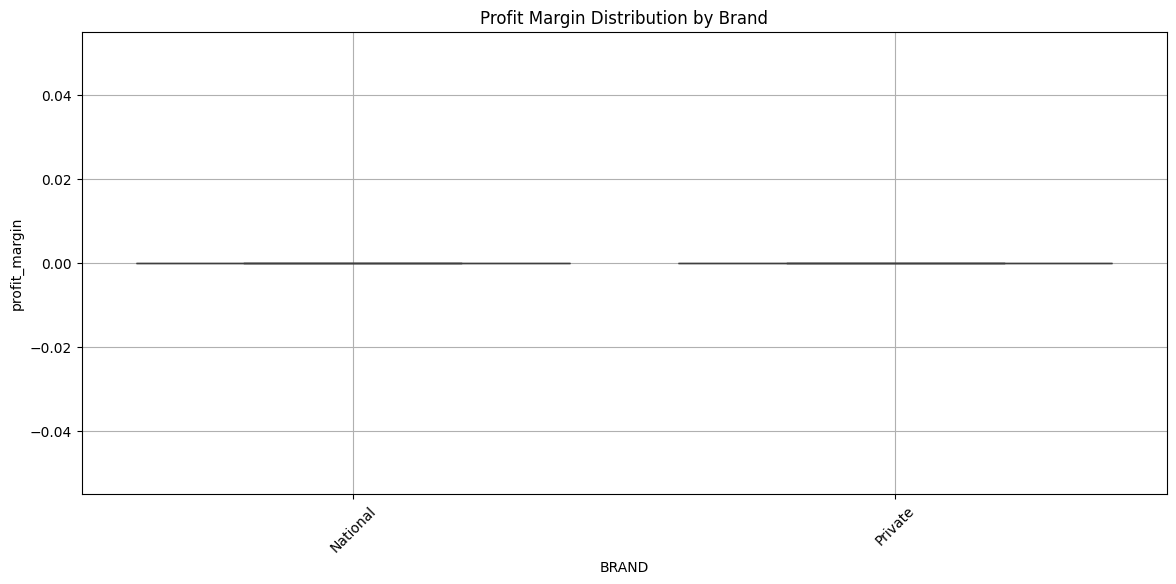

In [ ]:
# Step 5: Boxplot – Profit Margin by Brand
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='BRAND', y='profit_margin')
plt.title("Profit Margin Distribution by Brand")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Step 6: Only include numeric columns
numeric_cols = df.select_dtypes(include='number')
correlation = numeric_cols.corr()

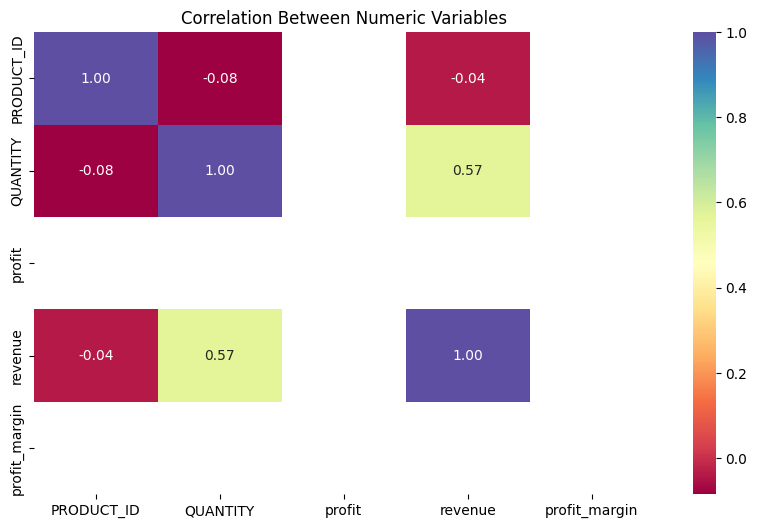

In [ ]:
# Step 7: Correlation Plot (If we have discount or promo columns)

# If your dataset includes discount or promo_flag columns:

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Correlation Between Numeric Variables")
plt.show()

In [ ]:
# Step 8: Promo Effect Scatter
if 'promo_flag' in df.columns:
    fig = px.scatter(
        df,
        x='promo_flag',
        y='profit_margin',
        color='brand',
        title='Promo Impact on Profit Margin',
        hover_data=['product_id', 'commodity_desc']
    )
    fig.show()
